In [73]:
import tensorflow as tf
from tensorflow import keras

In [74]:
# loading the data and splitting it to X_train,X_test -images and y_train,y_test - labels

fashion_mnist = keras.datasets.fashion_mnist
(train_images_full, train_labels_full), (test_images, test_labels) = fashion_mnist.load_data()

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [76]:
fashion_mnist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\fashion_mnist\\__init__.py'>

In [79]:
train_images_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [30]:
train_images_full.dtype

dtype('uint8')

In [34]:
# creating validation set and changing the range of the pixels - from 0 to 255 -> from 0 to 1

valid_images, train_images = train_images_full[:5000] / 255.0, train_images_full[5000:] / 255.0
valid_labels, train_labels = train_labels_full[:5000], train_labels_full[5000:]


In [41]:
# We notice that the labels are given without explaining which clothes they are supposed to represent. Therefore, we make a list 
# that will store the item names

label_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [33]:
class_names[train_labels[66]]

'Coat'

In [35]:
# For classification purposes in python, it will be much better to convert our 2d array into a 1d array, filling in row by row.
# Then we turn our flattened array into a numpy array object. 

def convert(nparray):
    l=[]
    dims=nparray.shape
    for i in range(dims[0]):
        l.append(nparray[i].flatten())
    l=np.array(l)
    return l

# calling the function to convert the images from 2d to 1d
train_images_mod = convert(train_images)
test_images_mod  = convert(test_images)
valid_images_mod=convert(valid_images)


In [48]:
train_images.shape

(55000, 28, 28)

In [49]:
train_images_mod

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
test_images.shape

(10000, 28, 28)

In [50]:
test_images_mod

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [38]:
valid_images.shape

(5000, 28, 28)

In [51]:
valid_images_mod

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
# We check the distribution of labels

for i in range(10):
    print ('Train label ' + str(i) + ' count :' + str(len([j for j in train_labels if j==i])))
    print ('Test label ' + str(i) + ' count :' + str(len([j for j in test_labels if j==i])))



Train label 0 count :5543
Test label 0 count :1000
Train label 1 count :5444
Test label 1 count :1000
Train label 2 count :5496
Test label 2 count :1000
Train label 3 count :5499
Test label 3 count :1000
Train label 4 count :5512
Test label 4 count :1000
Train label 5 count :5507
Test label 5 count :1000
Train label 6 count :5507
Test label 6 count :1000
Train label 7 count :5488
Test label 7 count :1000
Train label 8 count :5510
Test label 8 count :1000
Train label 9 count :5494
Test label 9 count :1000


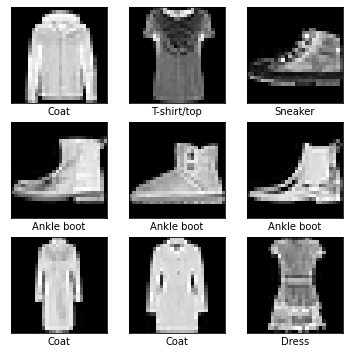

In [42]:
# Before procesing further, let us plot some items and their corresponding classes.

plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.gray()
    plt.imshow(train_images[i])
    plt.xlabel(label_names[train_labels[i]])
plt.savefig('image_examples.jpg')
plt.show()

In [57]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler_standard = StandardScaler()

In [61]:
train_images_standardized = train_images_mod.copy()
test_images_standardized = test_images.copy()
# X_train_normalized = X_train.copy()
# X_test_normalized = X_test.copy()

In [62]:
# Standardization:
scaler_standard.fit(train_images_mod)
train_images_standardized= scaler_standard.transform(train_images_standardized)

# the scaling is with the the same fitted scaler (by the train data)
#only transform on the test data
test_images_standardized = scaler_standard.transform(test_images_standardized)



ValueError: Found array with dim 3. StandardScaler expected <= 2.

In [66]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

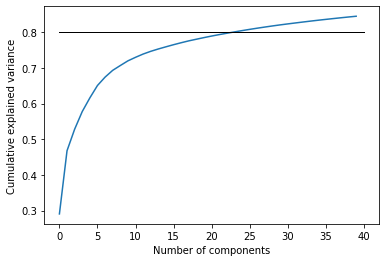

In [67]:
pca = PCA(n_components=40)
pca_fit = pca.fit_transform(train_images_mod)
variances = pca.explained_variance_ratio_

plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.plot(np.cumsum(variances))
plt.plot([0,40],[0.8,0.8],'k-',lw=1)
plt.savefig('expained_variance.jpg')
plt.show()

In [68]:
from sklearn.pipeline import Pipeline

In [71]:
pipe_log_reg_l2 = Pipeline([('pca',PCA(n_components=25)),('clf',LogisticRegression(multi_class='ovr',penalty='l2',solver='saga'))])
model_ovr=pipe_log_reg_l2.fit(train_images_mod,train_labels)
# pred_labels_pipe_log_reg_l2 = pipe_log_reg_l2.predict(test_images_mod)
# test_acc_pipe_l2 = accuracy_score(pred_labels_pipe_log_reg_l2,test_labels)
# print('Test accuracy of logistic regression on 25 PCs with l2 penalty : ' + str(test_acc_pipe_l2))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [72]:
model_ovr.score(train_images_mod, train_labels)

0.8058

## Multinomial logistic regression

In [44]:
# our problem is Multi-class Classification: Classification tasks with more than two classes.

In [ ]:
# Logistic Regression is designed for binary classification , therfore it cannot be used for multi-class classification tasks, at least not directly.

In [43]:
# our solution: The One-vs-Rest strategy splits a multi-class classification into one binary classification problem per class.

In [45]:
from sklearn.linear_model import LogisticRegression


In [55]:
logreg = LogisticRegression(multi_class='ovr',penalty='l2',solver='saga')
#LogisticRegression(multi_class='ovr',penalty='l2',solver='saga')

In [63]:
# fit the model with data
model_ovr2= logreg.fit(train_images_mod, train_labels)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

In [64]:
model_ovr2.score(train_images_mod, train_labels)

0.8725454545454545

In [ ]:
# # calling the function to convert the images from 2d to 1d
# train_images_mod = convert(train_images)
# test_images_mod  = convert(test_images)
# valid_images_mod=convert(valid_images)

# K-nearest neighbors and Nearest centroid